(example_1)=
# Example 2: Volatility coupling with an input node

In [1]:
%%capture
import sys
if 'google.colab' in sys.modules:
    ! pip install pyhgf

In [2]:
from pyhgf.distribution import HGFDistribution
from pyhgf.model import HGF
import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
import seaborn as sns

Where the standard continuous HGF assumes a known precision in the input node (usually set to something high), this assumption can be relaxed and the filter can also try to estimate this quantity from the data.

In [3]:
input_data = np.random.normal(size=1000)

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


Initializing a network with custom node structure.
... Create the update sequence from the network structure.
... Create the belief propagation function.
... Cache the belief propagation function.


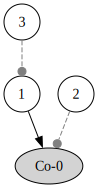

In [4]:
jget_hgf = (
    HGF(model_type=None)
    .add_input_node(kind="continuous")
    .add_value_parent(children_idxs=[0])
    .add_volatility_parent(children_idxs=[0])
    .add_volatility_parent(children_idxs=[1])
    .init()
)
jget_hgf.plot_network()

In [5]:
jget_hgf.attributes

{0: {'volatility_coupling_parents': (1.0,),
  'expected_precision': 10000.0,
  'time_step': nan,
  'value': nan,
  'value_coupling_parents': (1.0,)},
 1: {'mean': 0.0,
  'expected_mean': 0.0,
  'precision': 1.0,
  'expected_precision': 1.0,
  'volatility_coupling_children': None,
  'volatility_coupling_parents': (1.0,),
  'value_coupling_children': (1.0,),
  'value_coupling_parents': None,
  'tonic_volatility': -4.0,
  'tonic_drift': 0.0,
  'autoregressive_coefficient': 0.0,
  'autoregressive_intercept': 0.0},
 2: {'mean': 1.0,
  'expected_mean': 1.0,
  'precision': 1.0,
  'expected_precision': 1.0,
  'volatility_coupling_children': (1.0,),
  'volatility_coupling_parents': None,
  'value_coupling_children': None,
  'value_coupling_parents': None,
  'tonic_volatility': -4.0,
  'tonic_drift': 0.0,
  'autoregressive_coefficient': 0.0,
  'autoregressive_intercept': 0.0},
 3: {'mean': 1.0,
  'expected_mean': 1.0,
  'precision': 1.0,
  'expected_precision': 1.0,
  'volatility_coupling_childr

In [6]:
jget_hgf.input_data(input_data[:30])

Adding 30 new observations.


array([<Axes: ylabel='$\\mu_{3}$'>, <Axes: ylabel='$\\mu_{2}$'>,
       <Axes: ylabel='$\\mu_{1}$'>,
       <Axes: title={'left': 'Continuous Input Node 0'}>, <Axes: >],
      dtype=object)

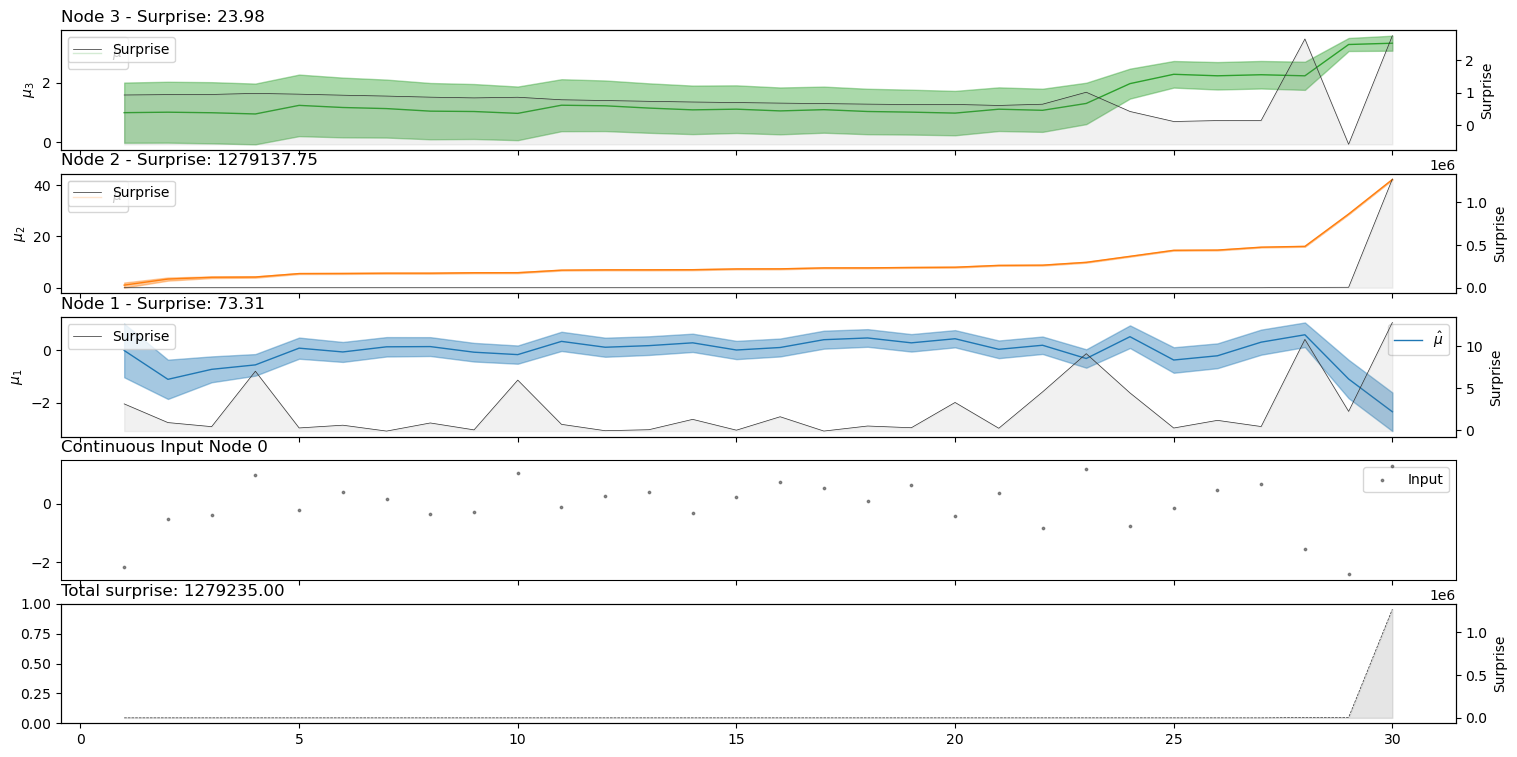

In [7]:
jget_hgf.plot_trajectories()

In [8]:
jget_hgf.to_pandas()

,time_steps,time,observation_input_0,x_1_mean,x_1_precision,x_1_expected_mean,x_1_expected_precision,x_2_mean,x_2_precision,x_2_expected_mean,x_2_expected_precision,x_3_mean,x_3_precision,x_3_expected_mean,x_3_expected_precision,x_1_surprise,x_2_surprise,x_3_surprise,surprise
0,1.0,1.0,-2.150568,-1.101401,1.952574,0.000000,0.952574,3.354826,2.858841,1.000000,0.982014,1.015537,0.976360,1.000000,0.982014,3.146033,3.650748e+00,0.928132,7.724913e+00
1,1.0,2.0,-0.517333,-0.719587,5.131937,-1.101401,1.777111,4.061489,12.460590,3.354826,2.716596,0.997051,0.967591,1.015537,0.959207,0.934562,1.097545e+00,0.939927,2.972034e+00
2,1.0,3.0,-0.378516,-0.549648,8.151491,-0.719587,4.090002,4.156062,21.209766,4.061489,10.145212,0.956462,0.981113,0.997051,0.950741,0.452560,-1.941923e-01,0.944978,1.203346e+00
3,1.0,4.0,0.992368,0.089525,10.026574,-0.549648,5.870512,5.500412,92.016388,4.156062,15.275635,1.244452,0.954851,0.956462,0.963794,7.013454,1.335946e+01,0.977345,2.135026e+01
4,1.0,5.0,-0.217190,-0.055614,11.623768,0.089525,6.123356,5.541942,55.715683,5.500412,34.266209,1.173058,1.014381,1.244452,0.938439,0.300907,-8.185909e-01,0.953099,4.354150e-01
5,1.0,6.0,0.385597,0.141135,12.427846,-0.055614,6.885904,5.650350,56.324810,5.541942,27.575628,1.136350,1.078747,1.173058,0.995878,0.624429,-5.774893e-01,0.921675,9.686148e-01
6,1.0,7.0,0.160085,0.149421,12.921779,0.141135,7.271429,5.650557,43.713425,5.650350,27.724022,1.050694,1.145496,1.136350,1.057846,-0.071732,-7.422105e-01,0.894702,8.075911e-02
7,1.0,8.0,-0.357774,-0.065146,13.356810,0.149421,7.706252,5.819724,59.074974,5.650557,24.276613,1.038416,1.203862,1.050694,1.121957,0.889129,-3.284504e-01,0.861486,1.422165e+00
8,1.0,9.0,-0.282054,-0.157165,13.718300,-0.065146,7.898576,5.847805,49.085354,5.819724,28.374203,0.976428,1.264806,1.038416,1.177890,0.071407,-7.426150e-01,0.839339,1.681314e-01
9,1.0,10.0,1.060097,0.348514,14.076729,-0.157165,8.228925,6.827981,167.307953,5.847805,25.847597,1.249763,1.348428,0.976428,1.236169,5.961625,1.170930e+01,0.859108,1.853004e+01
